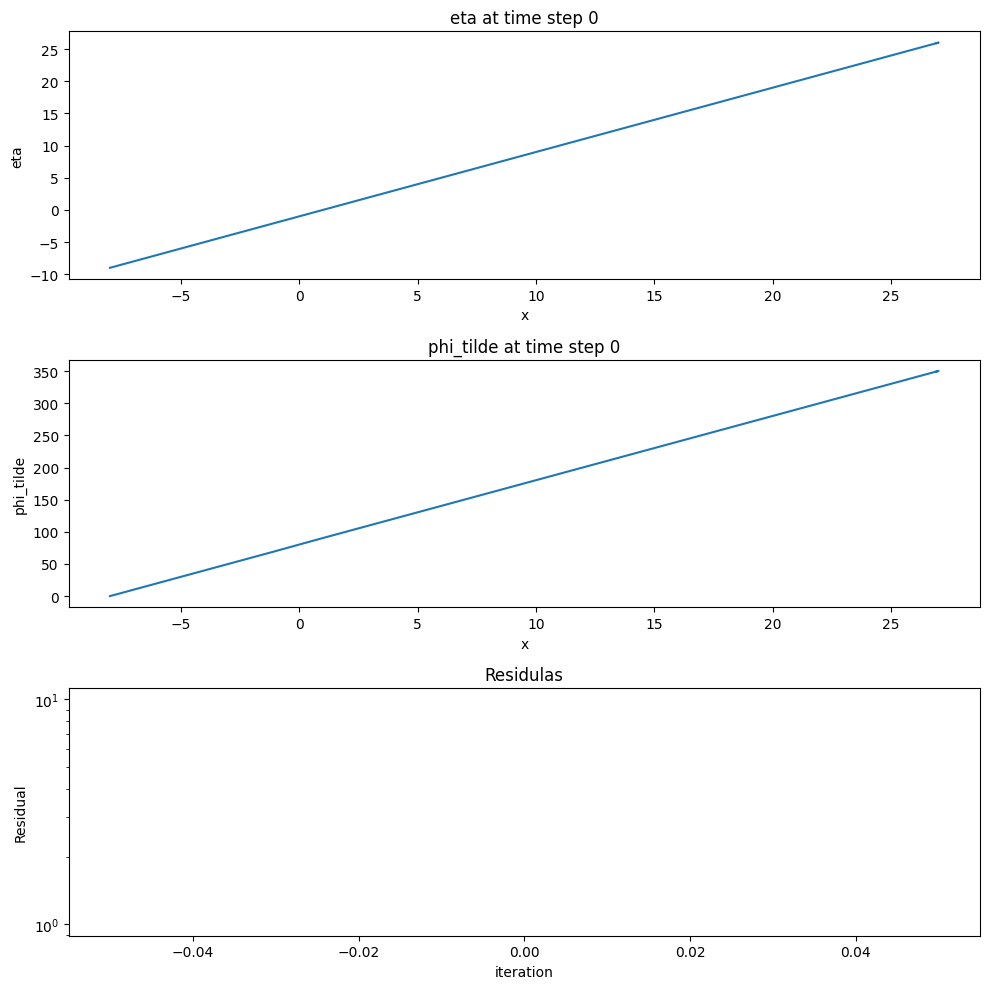

In [158]:
import matplotlib.pyplot as plt
import numpy as np

eta = np.load("./arrays/eta.npy")
phi = np.load("./arrays/phiTilde.npy")
fs_xs = np.load("./arrays/coordsFS.npy")
residuals = np.load("./arrays/residuals.npy")
residuals, time_step = residuals[:,0], residuals[:,1]

fig, ax = plt.subplots(3, 1, figsize = (10,10))

try:
    time = np.where(time_step == 0)[0][0] - 1
except:
    time = len(time_step) - 1

ax[0].plot(fs_xs[time][:], eta[time][:]-1)
#ax[0].plot(fs_xs[time-10][:], eta[time-10][:] - 1, alpha = 0.7, linestyle = "--")
#ax[0].plot(fs_xs[time-50][:], eta[time-50][:] - 1, alpha = 0.5, linestyle = "--")
ax[0].set_title(f"eta at time step {time}" )
ax[0].set_xlabel("x")
ax[0].set_ylabel("eta")


ax[1].plot(fs_xs[0], phi[time])
#ax[1].plot(fs_xs[0], phi[time-10], alpha = 0.7, linestyle = "--")
#ax[1].plot(fs_xs[0], phi[time-50], alpha = 0.5, linestyle = "--")
ax[1].set_title(f"phi_tilde at time step {time}" )
ax[1].set_xlabel("x")
ax[1].set_ylabel("phi_tilde")

ax[2].plot(residuals[:time])
ax[2].set_title("Residulas")
ax[2].set_xlabel("iteration")
ax[2].set_ylabel("Residual")
ax[2].set_yscale("log")

plt.tight_layout()
plt.show()

In [159]:
time_step


array([0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

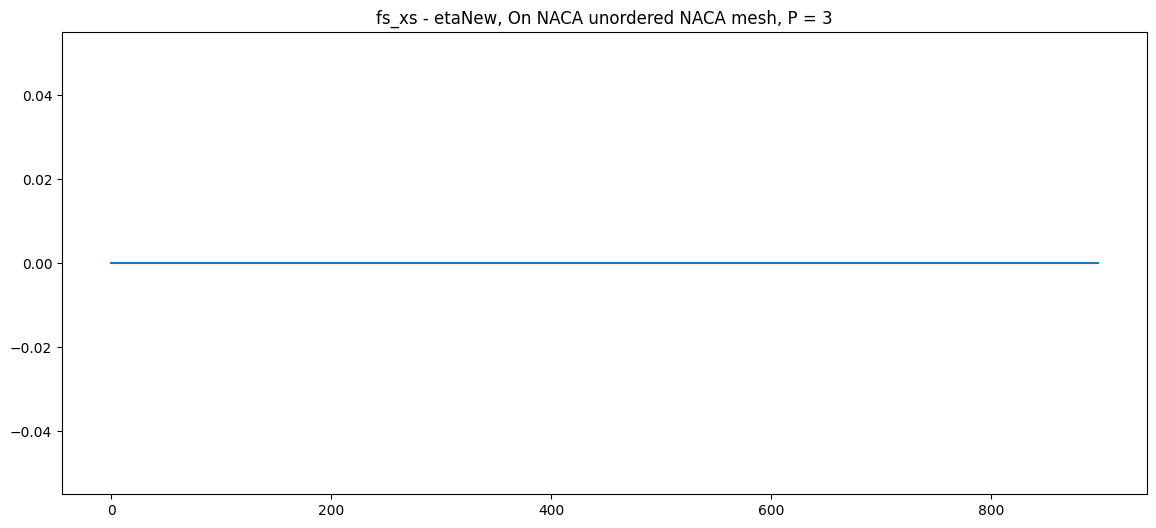

In [160]:
fig, ax = plt.subplots(1, 1, figsize = (14,6))
time = 0
ax.plot(fs_xs[time] - eta[time][:])
#ax.plot(np.linspace(-8,27, len(fs_xs[time])), np.sin(np.linspace(-8,27, len(fs_xs[time]))), linestyle = "--")
ax.set_title(f"fs_xs - etaNew, On NACA unordered NACA mesh, P = 3")

plt.show()

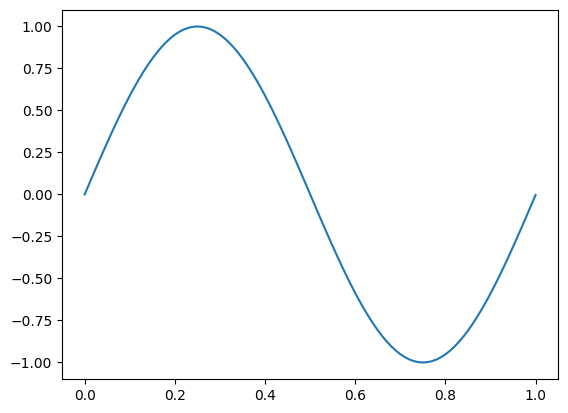

In [156]:
import firedrake as fd

P =3
mesh = fd.UnitSquareMesh(100, 100)
V = fd.FunctionSpace(mesh, "CG", P)
V1 = fd.FunctionSpace(mesh, "CG", 1)
fSIndecies = V.boundary_nodes(4)
coordsFS = (fd.Function(fd.VectorFunctionSpace(mesh, "CG", P)).interpolate(mesh.coordinates).dat.data)[fSIndecies,:]
fsMesh = fd.IntervalMesh(len(fSIndecies)-1, 0, 1)
fsMesh.coordinates.dat.data[:] = coordsFS[:,0]

Vfs = fd.FunctionSpace(fsMesh, "CG", 1)
eta = fd.Function(Vfs)
eta.dat.data[:] = coordsFS[:,1]

newEta = fd.Function(Vfs)
newEta.dat.data[:] = np.sin(2*3.14*coordsFS[:,0])

coords = mesh.coordinates.dat.data[:]
M = 0.5
coordsMask = coords[:, 1] > M

eta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], eta.dat.data[:])
newEta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], newEta.dat.data[:])

coords[coordsMask, 1] = M + (newEta2d - M)/(eta2d - M) * (coords[coordsMask, 1] - M)
mesh.coordinates.dat.data[:] = coords

plt.plot(coordsFS[::3,0], coords[V1.boundary_nodes(4), 1])


In [157]:
coordsFS.shape, fSIndecies.shape

((301, 2), (301,))